In [107]:
# --- All imports consolidated here ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from scipy.stats import zscore
from sklearn.feature_selection import RFE
from imblearn.combine import SMOTETomek
from collections import Counter
import joblib
import plotly.express as px
# ...existing code...

In [108]:
#read the dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [109]:
#display the first 5 rows of the dataframe
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [110]:
#display the summary statistics of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [111]:
#display the summary statistics of the dataframe
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<!-- Exploratory Data Analysis (EDA) is a crucial step in understanding the dataset before building any machine learning models. It helps in identifying patterns, spotting anomalies, and checking assumptions with the help of summary statistics and graphical representations. -->

In [112]:
# Count of missing values per column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df[missing_df['Missing Values'] > 0])  # Only show columns with missing data

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


In [113]:
#outlier detection using IQR method
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

outlier_summary = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = len(outliers)

# Display number of outliers per numerical column
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
print(outlier_df.sort_values(by='Outlier Count', ascending=False))

                          Outlier Count
TrainingTimesLastYear               238
PerformanceRating                   226
MonthlyIncome                       114
YearsSinceLastPromotion             107
YearsAtCompany                      104
StockOptionLevel                     85
TotalWorkingYears                    63
NumCompaniesWorked                   52
YearsInCurrentRole                   21
YearsWithCurrManager                 14
JobLevel                              0
JobInvolvement                        0
HourlyRate                            0
EnvironmentSatisfaction               0
EmployeeNumber                        0
EmployeeCount                         0
Education                             0
DistanceFromHome                      0
DailyRate                             0
Age                                   0
StandardHours                         0
MonthlyRate                           0
JobSatisfaction                       0
RelationshipSatisfaction              0


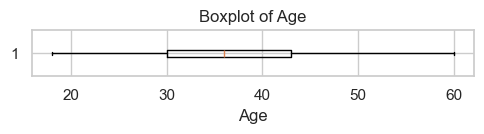

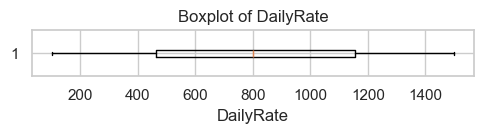

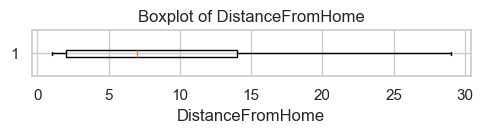

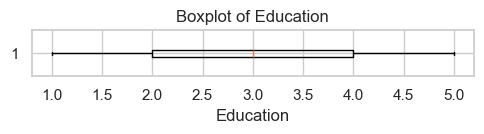

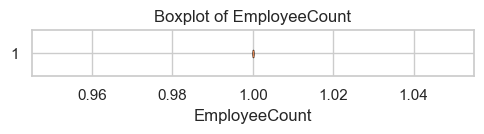

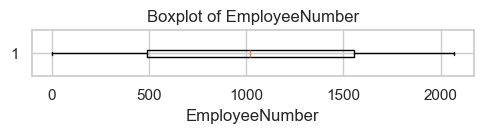

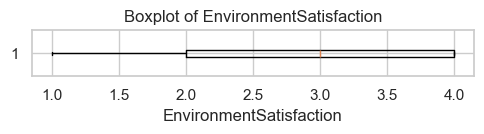

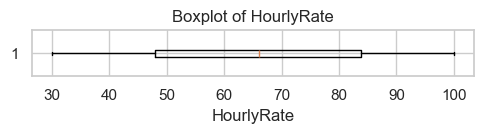

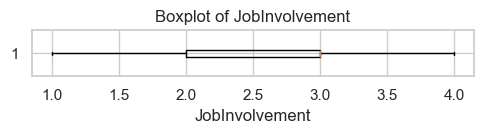

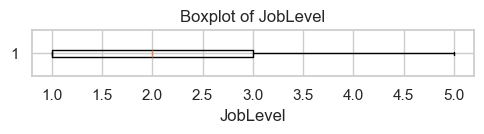

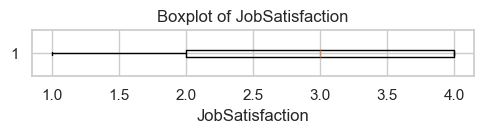

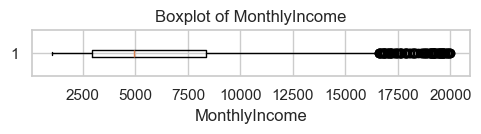

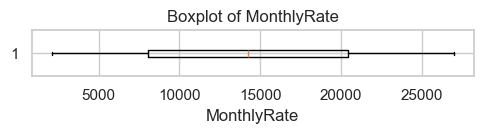

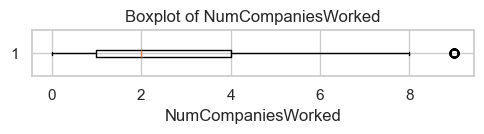

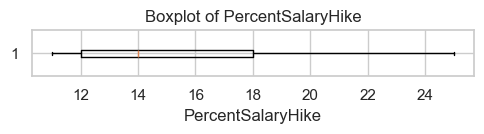

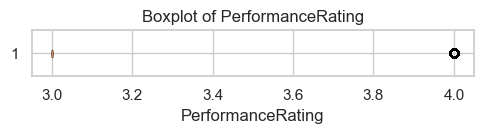

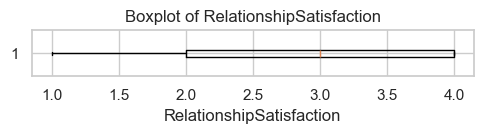

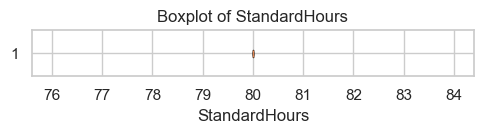

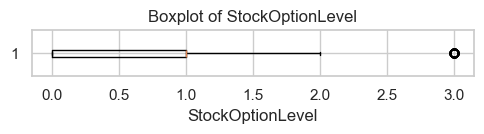

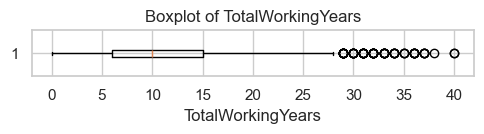

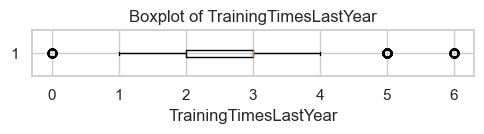

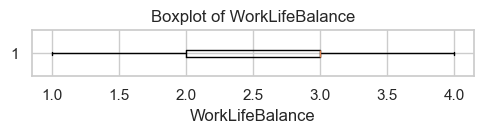

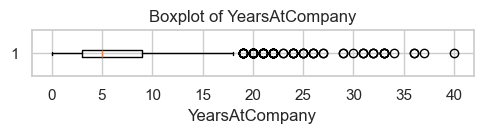

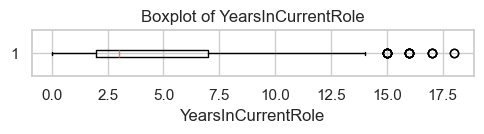

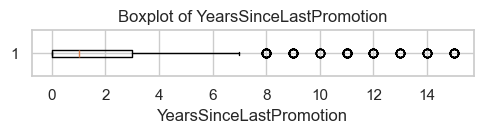

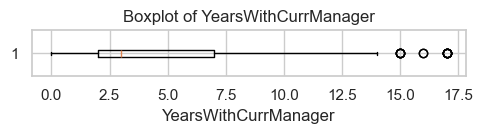

In [114]:
for col in numerical_cols:
    plt.figure(figsize=(5, 1.5))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


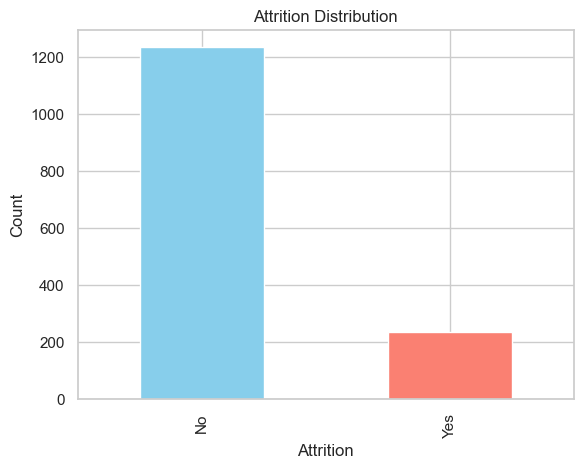

In [115]:
#visualization of target data relationships using matplotlib
attrition_counts = df['Attrition'].value_counts()
attrition_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Attrition Distribution")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()


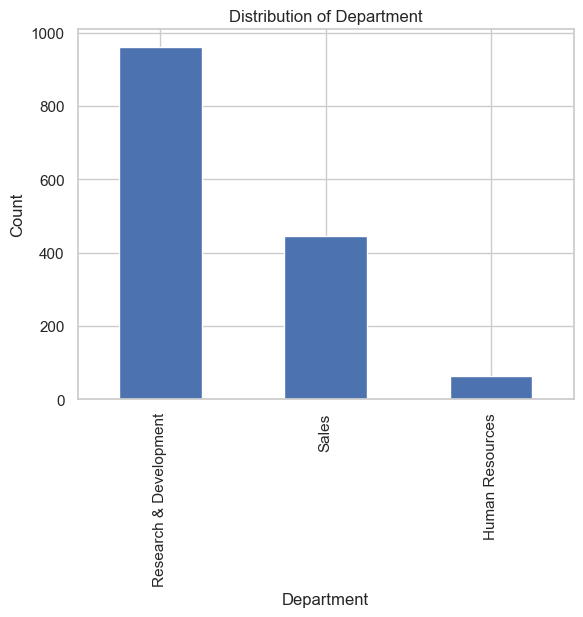

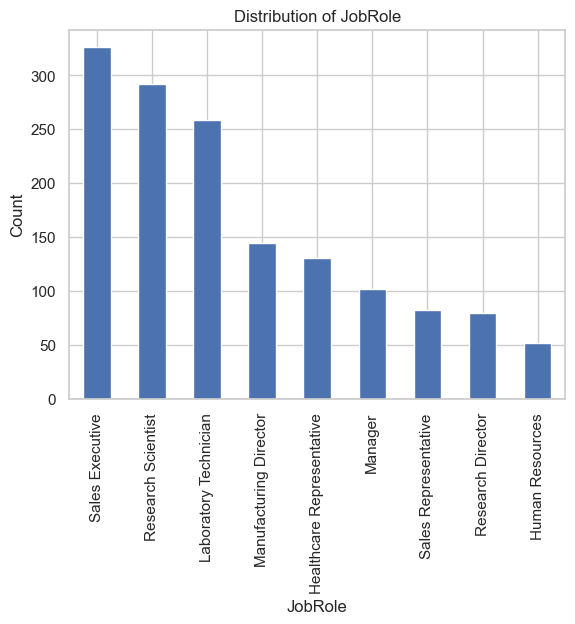

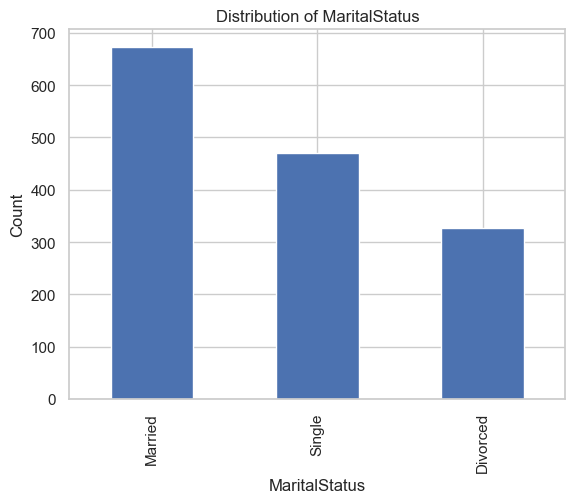

In [116]:
#visualization of categorical columns
categorical_cols = ['Department', 'JobRole', 'MaritalStatus']
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


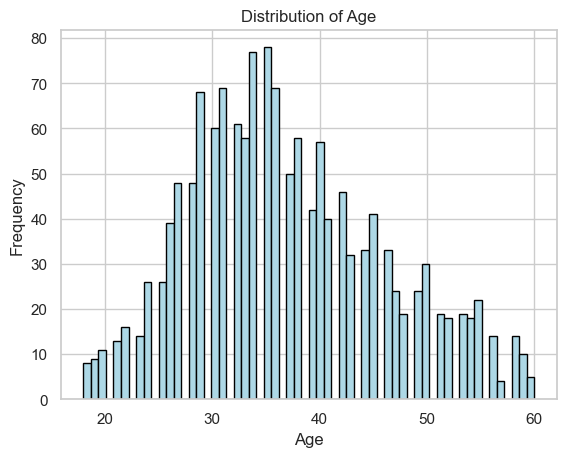

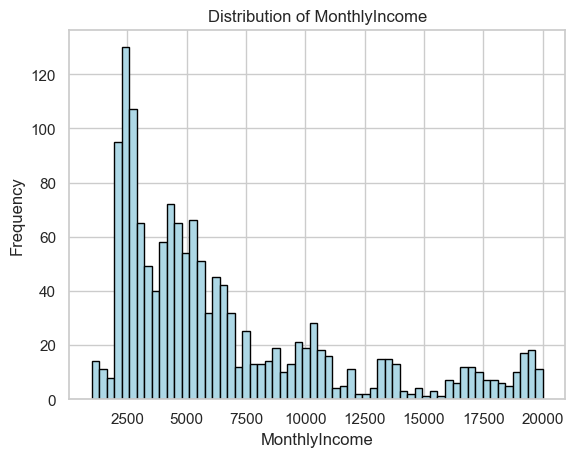

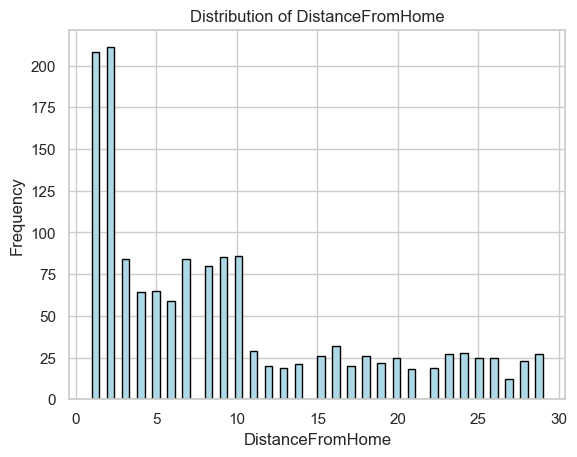

In [117]:
#visualizing distribution of numerical columns
numerical_cols = ['Age', 'MonthlyIncome', 'DistanceFromHome']
for col in numerical_cols:
    plt.hist(df[col], bins=60, color='lightblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [118]:
# Assuming 'Attrition' is your target
categorical_cols = df.select_dtypes(include='object').columns.drop('Attrition')
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


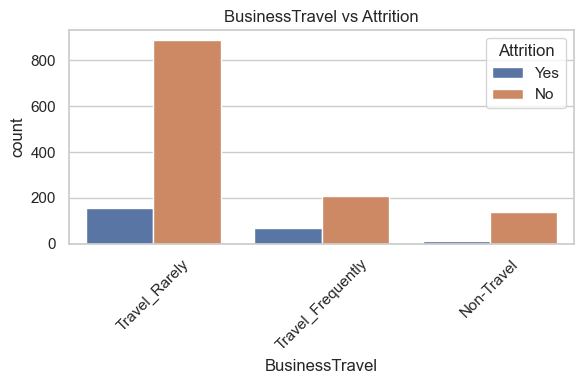

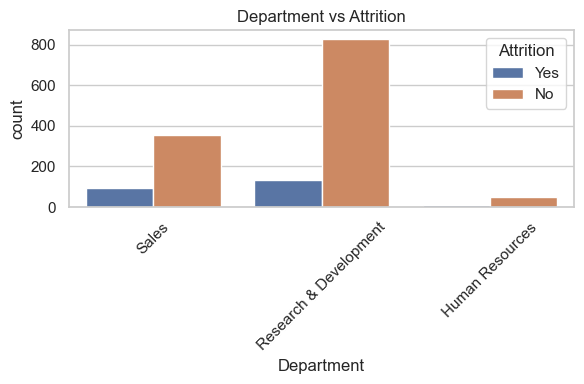

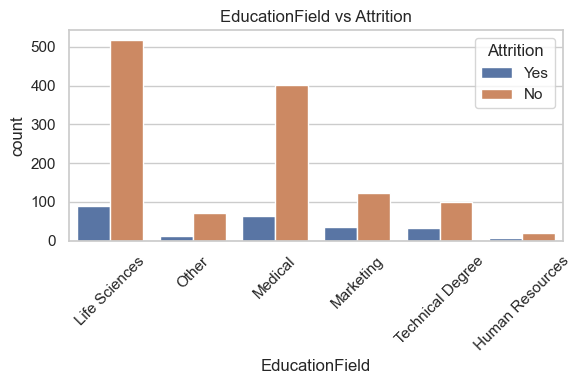

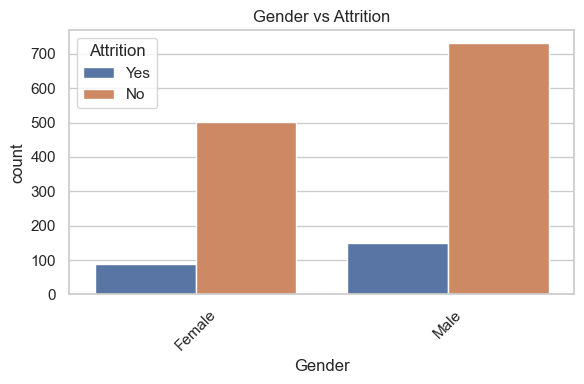

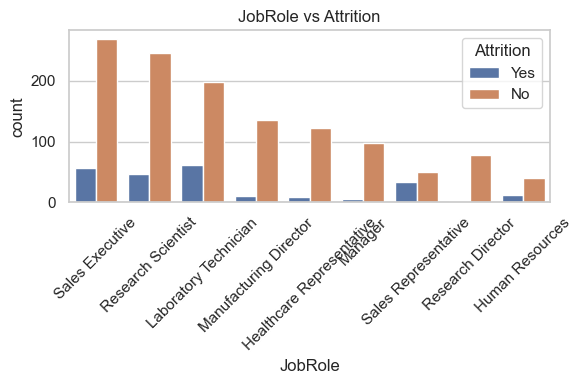

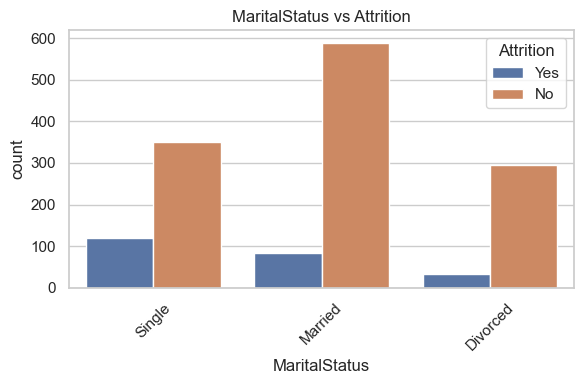

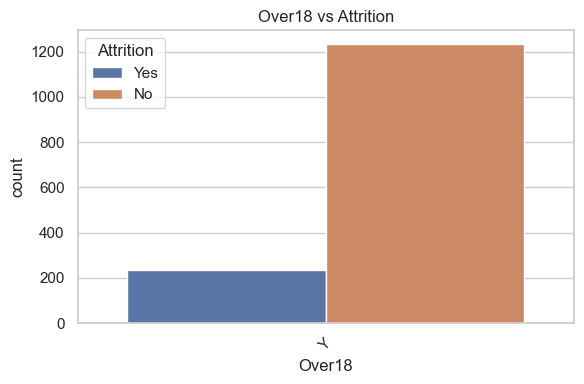

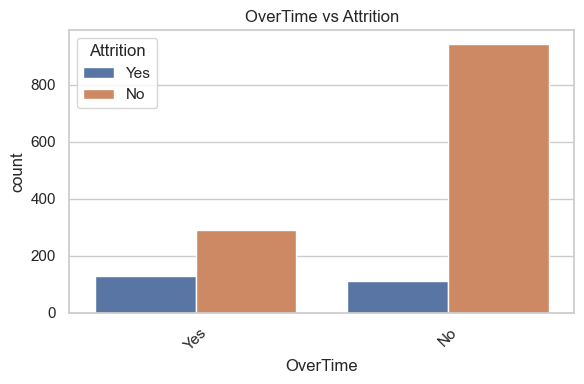

In [119]:
sns.set(style="whitegrid")
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Attrition')
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#from above plots we can see lets say overtime catogory "no" are not attriting majoritily and over18 are also majoritily not attriting 
and in marital status "single" and "married" are not attriting majoritily and in job role "sales executive" are not attriting majoritily and in department "sales" are not attriting majoritily and in age group 30-40 are not attriting majoritily and in distance from home 1-5 km are not attriting majoritily and in monthly income 5000-10000 are not attriting majoritily

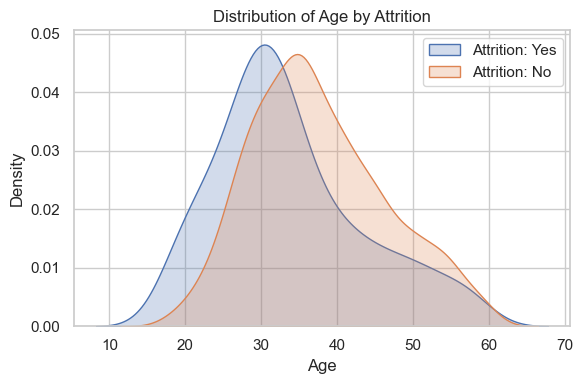

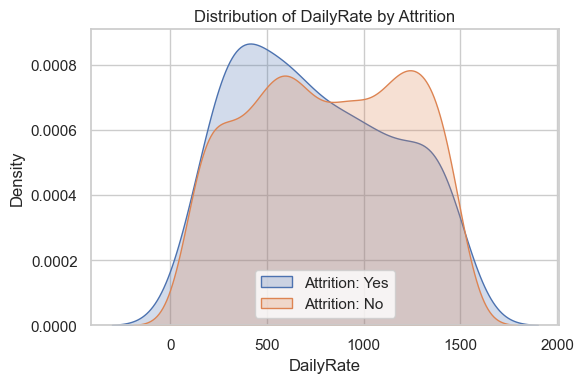

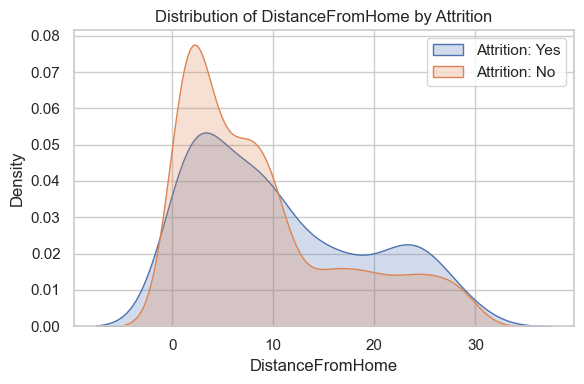

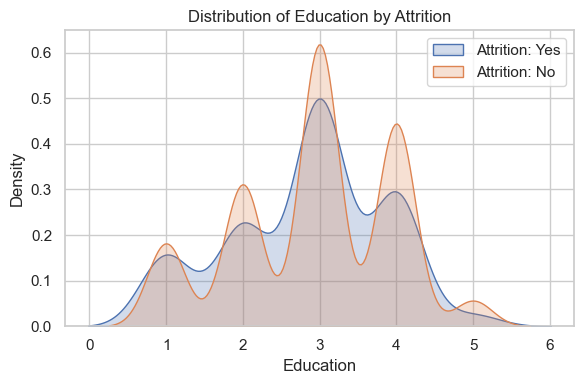

C:\Users\SYAM KUMAR\AppData\Local\Temp\ipykernel_26392\2852974216.py:4: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\SYAM KUMAR\AppData\Local\Temp\ipykernel_26392\2852974216.py:4: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\SYAM KUMAR\AppData\Local\Temp\ipykernel_26392\2852974216.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



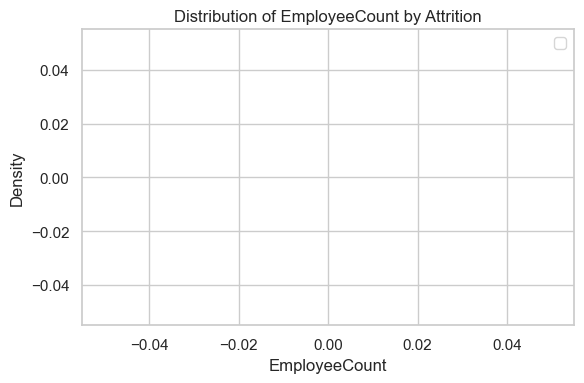

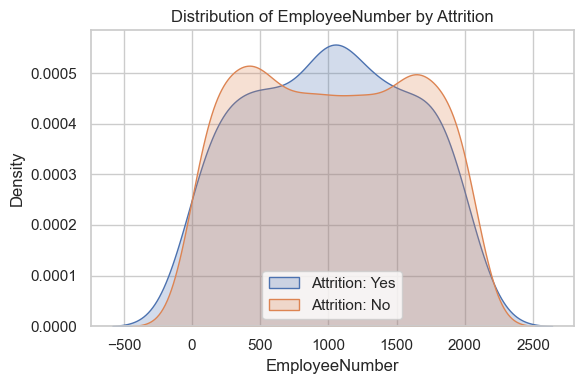

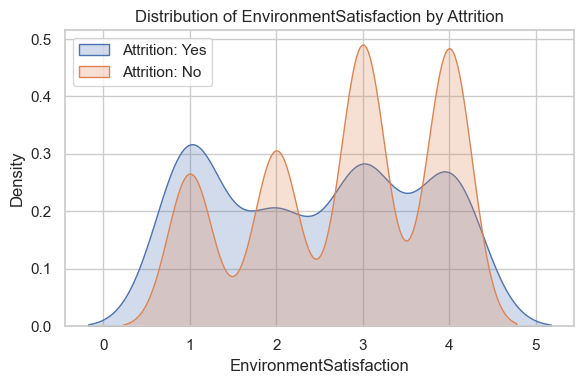

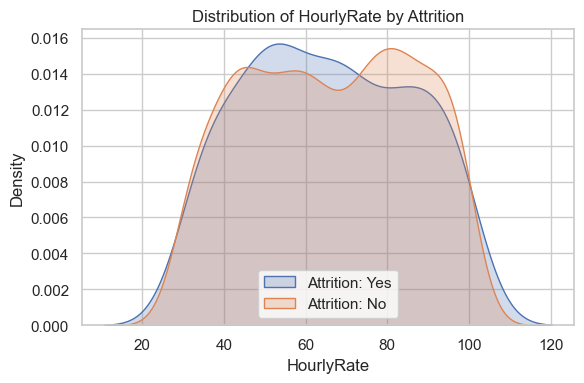

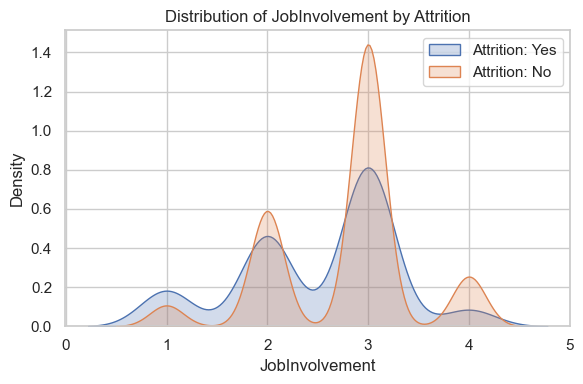

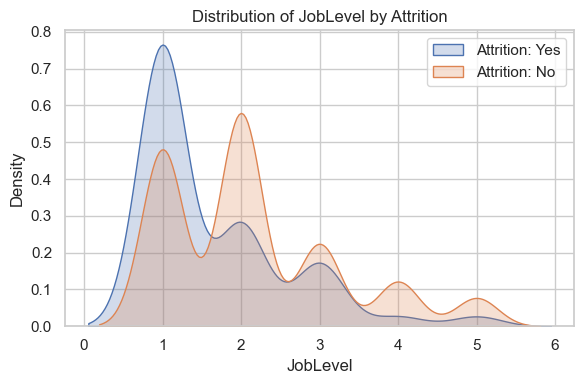

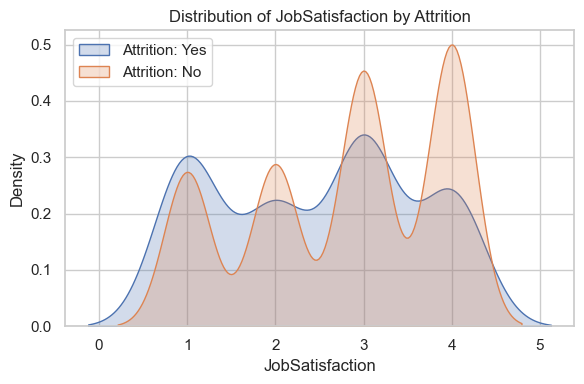

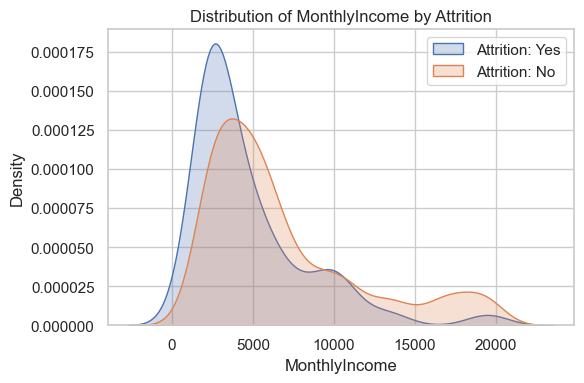

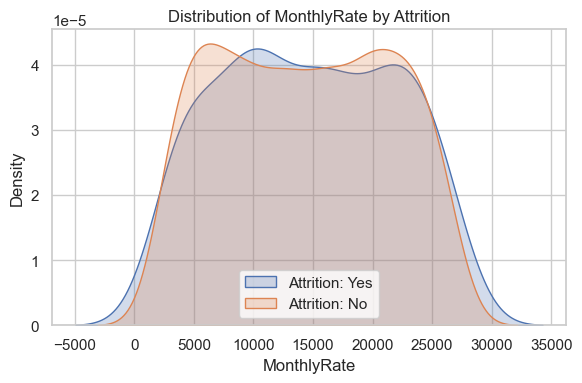

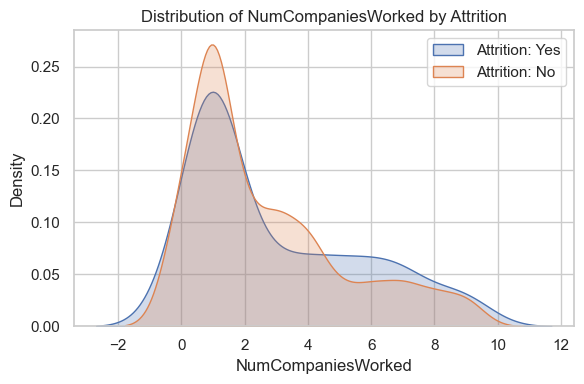

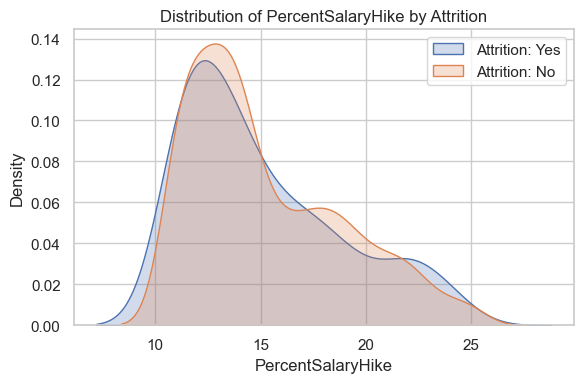

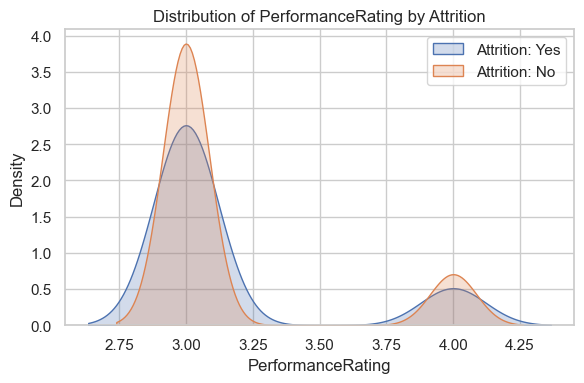

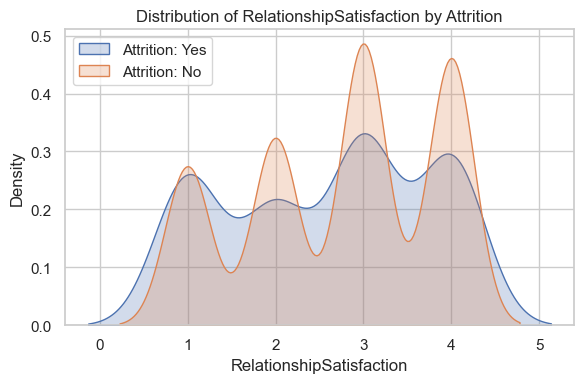

C:\Users\SYAM KUMAR\AppData\Local\Temp\ipykernel_26392\2852974216.py:4: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\SYAM KUMAR\AppData\Local\Temp\ipykernel_26392\2852974216.py:4: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\SYAM KUMAR\AppData\Local\Temp\ipykernel_26392\2852974216.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



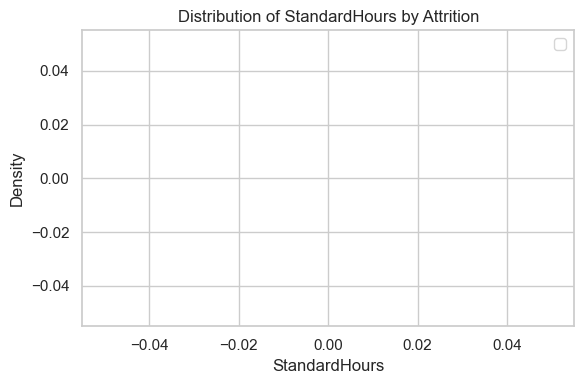

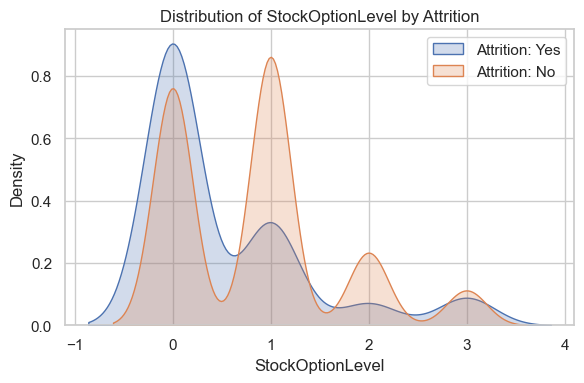

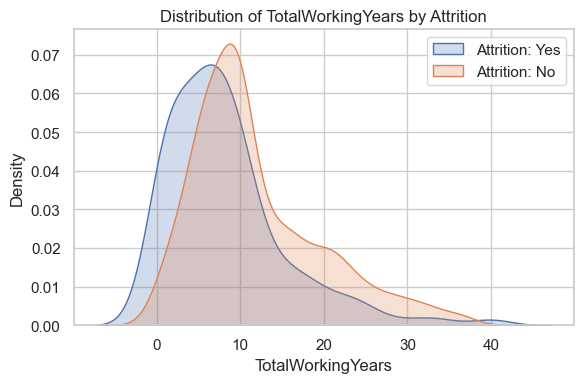

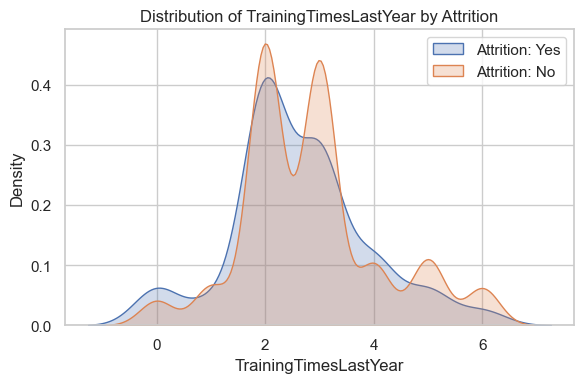

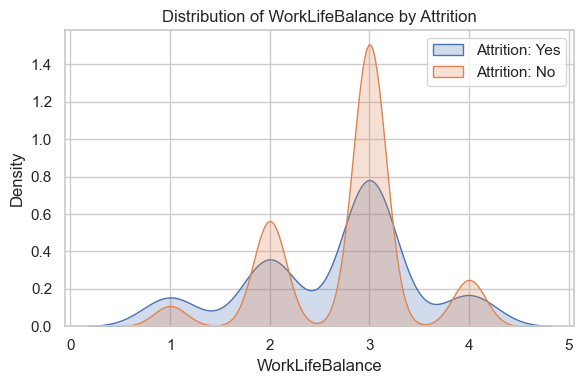

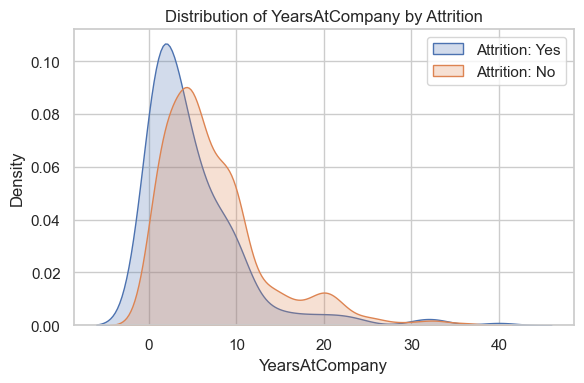

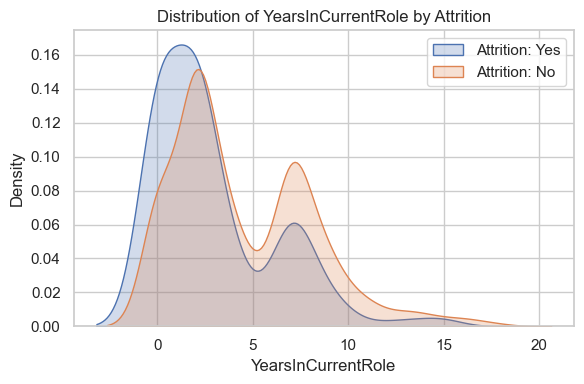

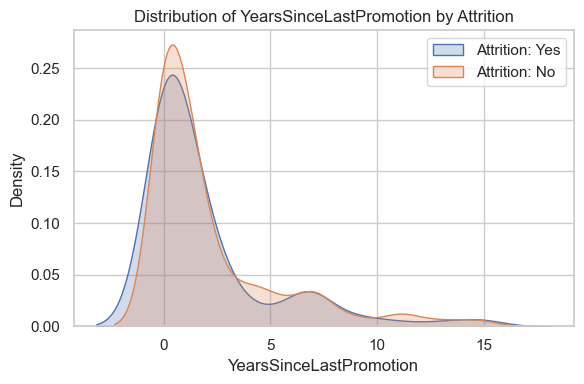

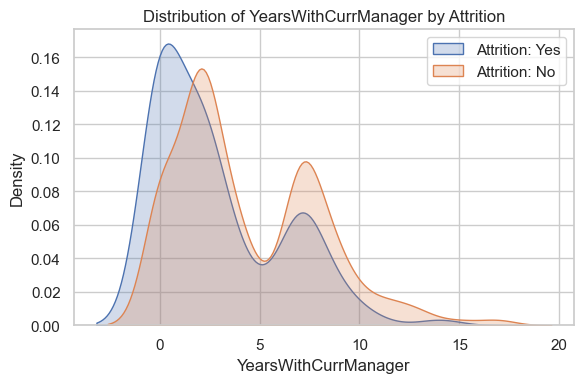

In [120]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    for value in df['Attrition'].unique():
        sns.kdeplot(df[df['Attrition'] == value][col], label=f"Attrition: {value}", fill=True)
    plt.title(f'Distribution of {col} by Attrition')
    plt.xlabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()


A KDE (Kernel Density Estimate) plot shows the probability distribution of a continuous variable. When used with a target like Attrition, it helps compare how a feature’s values are distributed across different classes, highlighting patterns or separations.column wise we can see these are less seperable so may be combination of data will help in prediction


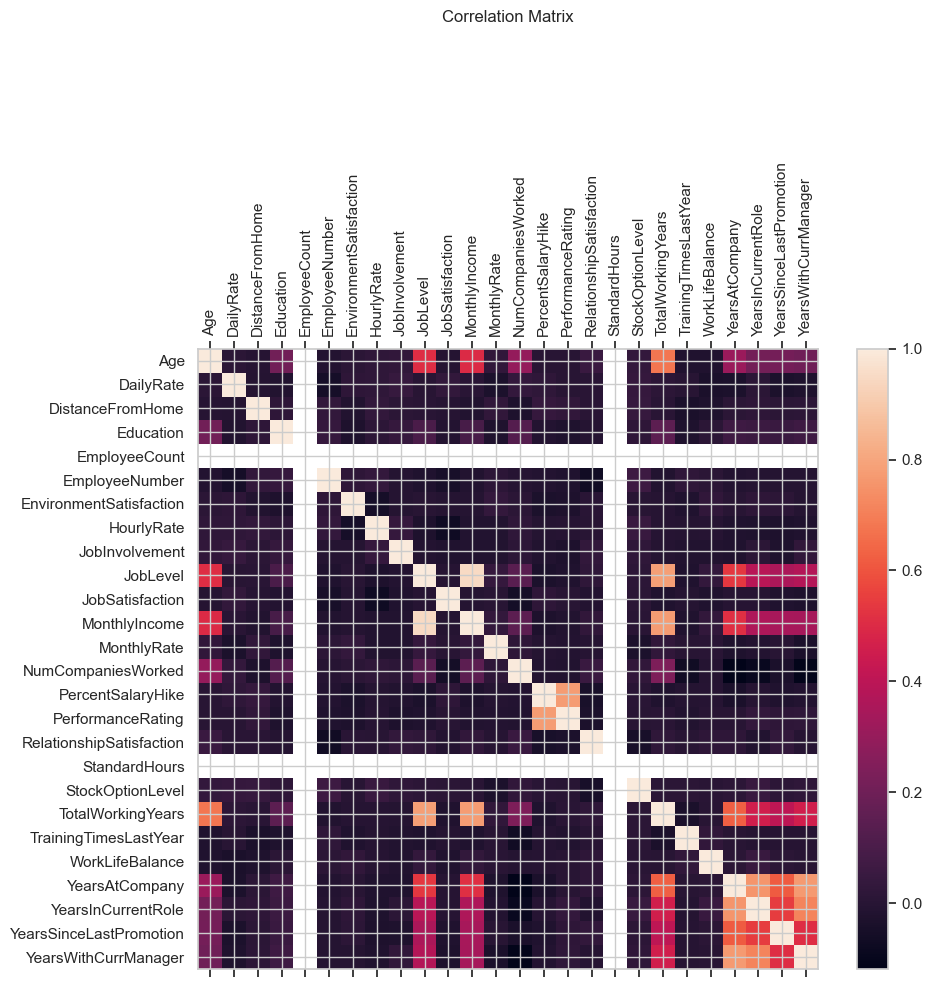

In [121]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
plt.matshow(corr, fignum=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlation Matrix", pad=100)
plt.show()

Data Preprocessing

In [122]:
#outlier replacement using Z-score and IQR methods
from scipy.stats import zscore
# Copy the dataframe to preserve original
df_cleaned = df.copy()

for col in numerical_cols:
    # Calculate Z-scores
    z_scores = zscore(df_cleaned[col], nan_policy='omit')
    
    # Calculate IQR
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Conditions for outliers using both Z-score and IQR
    z_outliers = (z_scores > 3) | (z_scores < -3)
    iqr_outliers = (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)
    
    # Final condition: outliers by both methods
    outlier_mask = z_outliers & iqr_outliers
    
    # Replace with mean
    mean_value = df_cleaned[col].mean()
    df_cleaned.loc[outlier_mask, col] = mean_value

C:\Users\SYAM KUMAR\AppData\Local\Temp\ipykernel_26392\942529843.py:26: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '36.923809523809524' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\SYAM KUMAR\AppData\Local\Temp\ipykernel_26392\942529843.py:26: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '802.4857142857143' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\SYAM KUMAR\AppData\Local\Temp\ipykernel_26392\942529843.py:26: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.19251700680272' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\SYAM KUMAR\AppData\Local\Temp\ipykernel_26392\942529843.py:26: F

In [123]:
# Label Encoding for categorical columns#model cannot understand categorical data, so we need to convert them into numerical format
#booosting algorithms like XGBoost, LightGBM, and CatBoost can handle categorical data directly, but for other models, we need to encode them.
# from sklearn.preprocessing import LabelEncoder

# Make a copy of the DataFrame
df_encoded = df_cleaned.copy()

# Identify categorical columns (excluding target if needed)
categorical_cols = df_encoded.select_dtypes(include='object').columns

# Initialize the encoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [124]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   int64  
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   int64  
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   int64  
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   float64
 10  EnvironmentSatisfaction   1470 non-null   float64
 11  Gender                    1470 non-null   int64  
 12  HourlyRate                1470 non-null   float64
 13  JobInvolvement            1470 non-null   float64
 14  JobLevel

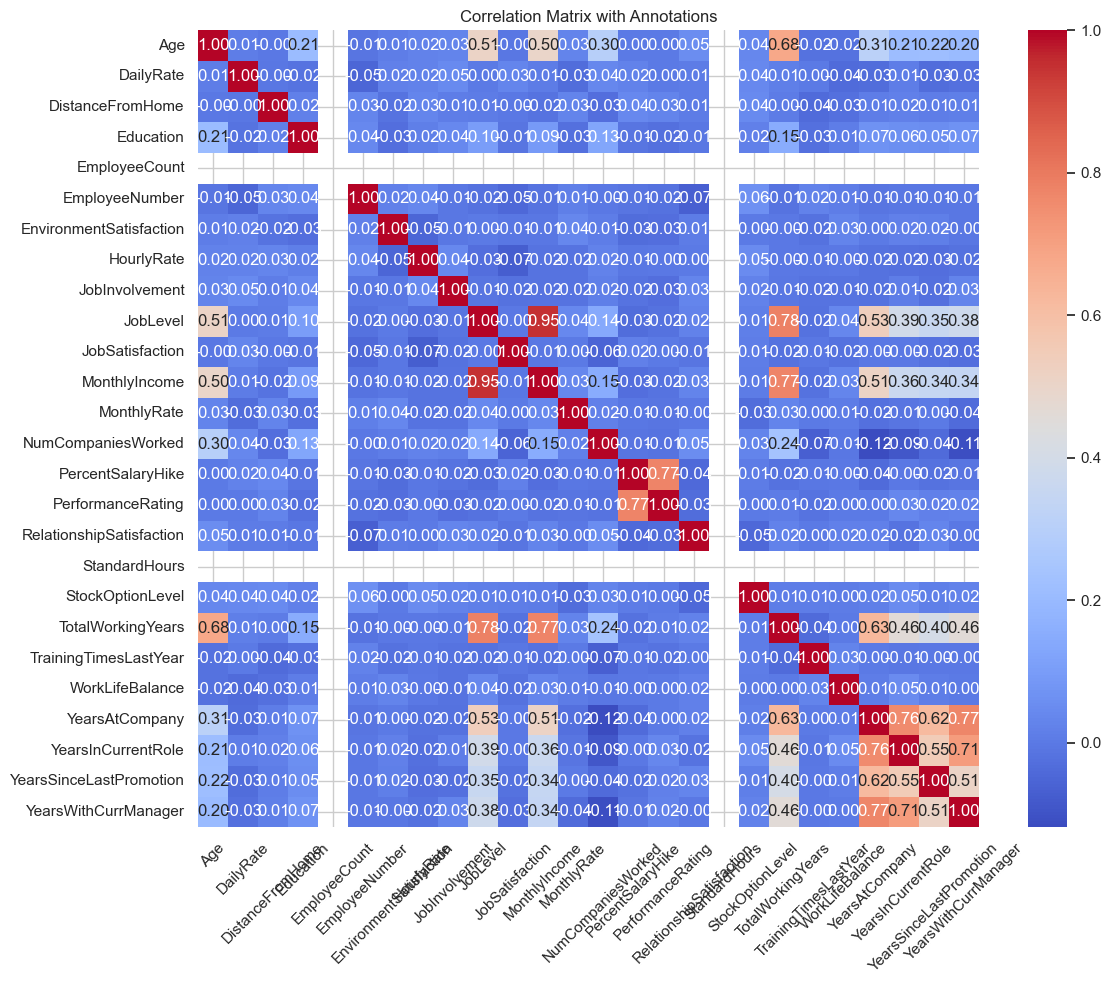

In [125]:

# import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix with Annotations")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [126]:
df_encoded.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.646801,-0.019621,-0.021490,0.232424,0.191249,0.135470,0.185996
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.180076,-0.059478,-0.063939,-0.161785,-0.155660,-0.037780,-0.150640
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.024764,0.015240,-0.011256,-0.015520,-0.016663,-0.020701,-0.044062
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.035431,0.002453,-0.037848,-0.009500,0.015316,-0.047123,-0.011518
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.016245,0.036875,0.026383,0.030062,0.057211,0.047982,0.038716
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,-0.003707,-0.036942,-0.026556,0.014679,0.021914,-0.004076,0.004658
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.128827,-0.025100,0.009819,0.036433,0.062837,0.047136,0.055449
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.021086,0.049195,0.041191,-0.020186,-0.011020,0.021800,-0.001808
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.008456,0.023603,0.010309,0.007894,-0.004943,-0.014559,0.003202


In [127]:
#using plotly for interactive visualization


# Compute correlation
# corr = `df_encoded.corr()` is calculating the correlation matrix for the DataFrame `df_encoded`. This function computes pairwise correlation of columns, excluding NA/null values, and returns a DataFrame where the rows and columns are the variables and the values are the correlation coefficients.

# Create interactive heatmap
fig = px.imshow(df_encoded.corr(),
                text_auto=True,  # show values on cells
                color_continuous_scale='RdBu_r',
                title="Correlation Matrix (Hover for Values)",
                labels=dict(color="Correlation"))

fig.update_layout(width=800, height=700)
fig.show()


<!-- As per above correlation plot, we can see that many features are having correlation with other features but with target there are no features having atleast more than +/-0.5 correlation. This indicates that the features are not strongly correlated with the target variable, which is 'Attrition' in this case. This suggests that the model may need to rely on complex interactions between features to predict attrition effectively.And also you can see yearsAtCompany and yearsInCUrrentRole are having more than 0.7 correaltion so both are conveying same information even if you drop any ome feature it is okay to reduce dimensionality without losing much information. -->

<!-- # Selecting top 20 features using RFE with RandomForestClassifier just to avoid overfitting and computational complexity -->

In [128]:

# Define independent variables (X) and target (y)
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Initialize model (Random Forest used here, you can try LogisticRegression, etc.)
model = RandomForestClassifier(random_state=42)

# Create the RFE model and select top 20 features
rfe = RFE(estimator=model, n_features_to_select=20)
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Top 20 Selected Features:")
print(selected_features)


Top 20 Selected Features:
Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobRole', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')


In [129]:
x = df_encoded[selected_features]


In [130]:
# I just want to use both distance based algorithms and tree based algorithms for classifcation tasks. So performing scaling on the data basically tree based algorithms not require scaling but no issue even if you apply scaling on the data.

In [131]:

#I have already replaced outliers in the data, so I am using StandardScaler here. if you want to use RobustScaler, you can uncomment the respective lines.

scaler = StandardScaler()

# Fit and transform the numeric columns
df_scaled = x.copy()
df_scaled = scaler.fit_transform(df_scaled)


In [132]:

# Performing Train Test Split before applying SMOTETomek to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTETomek with 50% sampling strategy means it make minority class samples equal to 50% of majority class samples
smt = SMOTETomek(random_state=42, sampling_strategy="auto")

# Fit and resample the training data
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

# Check class distribution after balancing
from collections import Counter
print("Original:", Counter(y_train))
print("Resampled:", Counter(y_resampled))


Original: Counter({0: 986, 1: 190})
Resampled: Counter({0: 985, 1: 985})


In [133]:
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000,class_weight='balanced'), {
        'classifier__C': [0.1, 1, 10]
    }),
    "Random Forest": (RandomForestClassifier(class_weight='balanced'), {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 10]
    }),
    "SVM": (SVC(probability=True), {
        'classifier__C': [0.1, 1],
        'classifier__kernel': ['linear', 'rbf']
    }),
    "Naive Bayes": (GaussianNB(), {
        # No hyperparameters to tune for basic GaussianNB
    }),
    "Decision Tree": (DecisionTreeClassifier(), {
        'classifier__max_depth': [None, 10, 20]
    }),
    "KNN": (KNeighborsClassifier(), {
        'classifier__n_neighbors': [3, 5, 7]
    }),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [3, 6]
    })
}

best_model_overall = None
best_model_name = None
best_model_accuracy = 0.0  # Start with 0 accuracy

results = {}

for name, (model, param_grid) in models.items():
    pipe = Pipeline([
        ('classifier', model)
    ])

    if param_grid:
        grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        best_params = grid.best_params_
    else:
        pipe.fit(X_train, y_train)
        best_model = pipe
        best_params = "Default"

    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # Save result
    results[name] = {
        'accuracy': acc,
        'best_params': best_params
    }

    print(f"{name}: Accuracy = {acc:.4f}, Best Params = {best_params}")

    # Track the best model
    if acc > best_model_accuracy:
        best_model_accuracy = acc
        best_model_overall = best_model
        best_model_name = name

# === Save the best model ===
print(f"\nSaving best model: {best_model_name} with accuracy {best_model_accuracy:.4f}")
joblib.dump(best_model_overall, 'best_model.pkl')

Logistic Regression: Accuracy = 0.7177, Best Params = {'classifier__C': 0.1}
Random Forest: Accuracy = 0.8231, Best Params = {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
SVM: Accuracy = 0.8571, Best Params = {'classifier__C': 1, 'classifier__kernel': 'rbf'}
Naive Bayes: Accuracy = 0.8061, Best Params = Default
Decision Tree: Accuracy = 0.8061, Best Params = {'classifier__max_depth': 10}
KNN: Accuracy = 0.8401, Best Params = {'classifier__n_neighbors': 7}


c:\Users\SYAM KUMAR\attrition_project\ds\lib\site-packages\xgboost\training.py:183: UserWarning:

[12:13:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\SYAM KUMAR\attrition_project\ds\lib\site-packages\xgboost\training.py:183: UserWarning:

[12:13:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\SYAM KUMAR\attrition_project\ds\lib\site-packages\xgboost\training.py:183: UserWarning:

[12:13:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\SYAM KUMAR\attrition_project\ds\lib\site-packages\xgboost\training.py:183: UserWarning:

[12:13:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\SYAM KUMAR\attrition_project\ds\lib\site-packages\xgboost\training.

XGBoost: Accuracy = 0.8503, Best Params = {'classifier__max_depth': 3, 'classifier__n_estimators': 50}

Saving best model: SVM with accuracy 0.8571


['best_model.pkl']

In [134]:
results_df = pd.DataFrame(results).T
results_df.sort_values(by='accuracy', ascending=False, inplace=True)
results_df

,accuracy,best_params
SVM,0.857143,"{'classifier__C': 1, 'classifier__kernel': 'rbf'}"
XGBoost,0.85034,"{'classifier__max_depth': 3, 'classifier__n_es..."
KNN,0.840136,{'classifier__n_neighbors': 7}
Random Forest,0.823129,"{'classifier__max_depth': 10, 'classifier__n_e..."
Naive Bayes,0.806122,Default
Decision Tree,0.806122,{'classifier__max_depth': 10}
Logistic Regression,0.717687,{'classifier__C': 0.1}


In [135]:

# --- To load the model later ---
loaded_model = joblib.load('best_model.pkl')

Classification Report:

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       1.00      0.11      0.19        47

    accuracy                           0.86       294
   macro avg       0.93      0.55      0.56       294
weighted avg       0.88      0.86      0.81       294



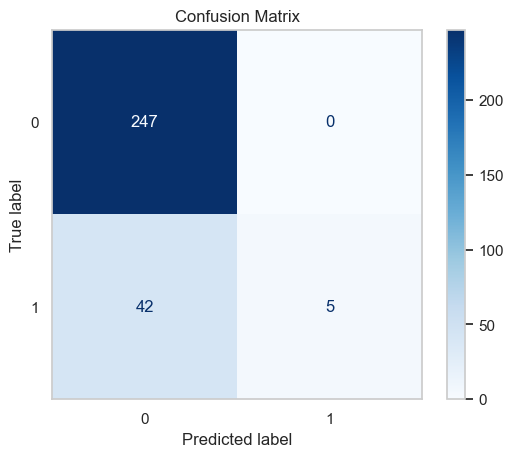

In [136]:

# Predict on test set
y_pred = loaded_model.predict(X_test)

# --- Print Classification Report ---
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# --- Plot Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=loaded_model.classes_,)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [137]:
# so for imbalanced data instead of focusing accuracy, we can focus on precision, recall, and F1-score.
# These metrics give a better understanding of the model's performance on imbalanced datasets.
# so now I will save the best model using recall of the class 1 (Attrition = Yes) as the metric.


Logistic Regression
Accuracy: 0.7177
Recall (Attrition = Yes): 0.7447
Best Params: {'classifier__C': 0.1}
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       247
           1       0.33      0.74      0.46        47

    accuracy                           0.72       294
   macro avg       0.63      0.73      0.63       294
weighted avg       0.84      0.72      0.75       294



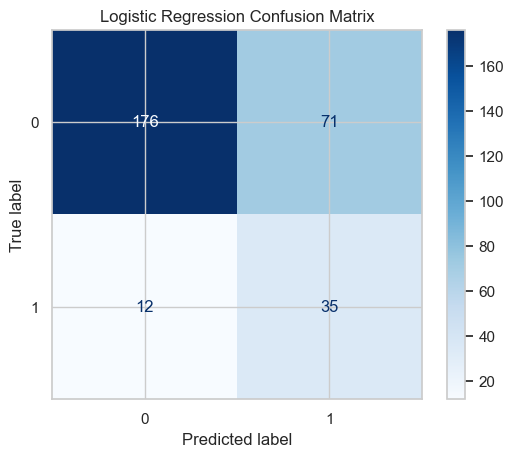


Random Forest
Accuracy: 0.8197
Recall (Attrition = Yes): 0.1277
Best Params: {'classifier__max_depth': 10, 'classifier__n_estimators': 50}
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       247
           1       0.33      0.13      0.18        47

    accuracy                           0.82       294
   macro avg       0.59      0.54      0.54       294
weighted avg       0.77      0.82      0.78       294



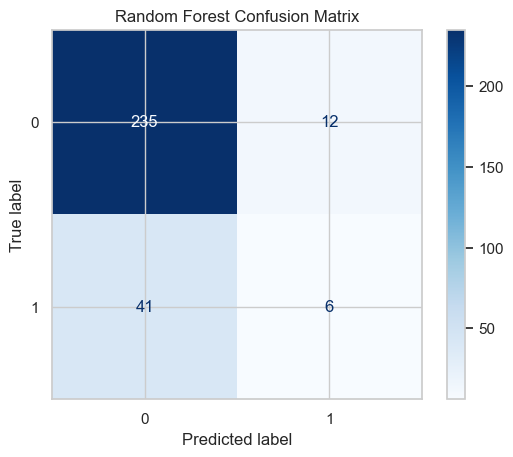


SVM
Accuracy: 0.8571
Recall (Attrition = Yes): 0.1064
Best Params: {'classifier__C': 1, 'classifier__kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       1.00      0.11      0.19        47

    accuracy                           0.86       294
   macro avg       0.93      0.55      0.56       294
weighted avg       0.88      0.86      0.81       294



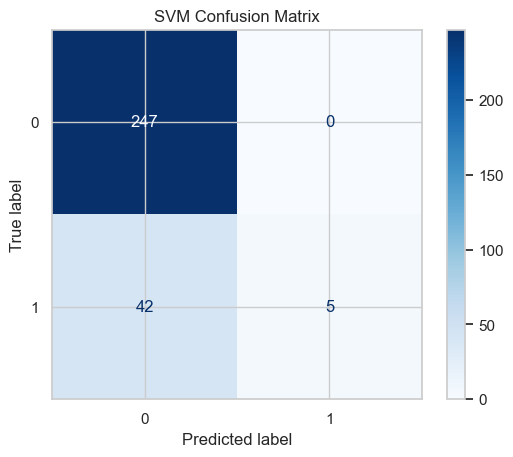


Naive Bayes
Accuracy: 0.8061
Recall (Attrition = Yes): 0.5745
Best Params: Default
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       247
           1       0.42      0.57      0.49        47

    accuracy                           0.81       294
   macro avg       0.67      0.71      0.68       294
weighted avg       0.83      0.81      0.82       294



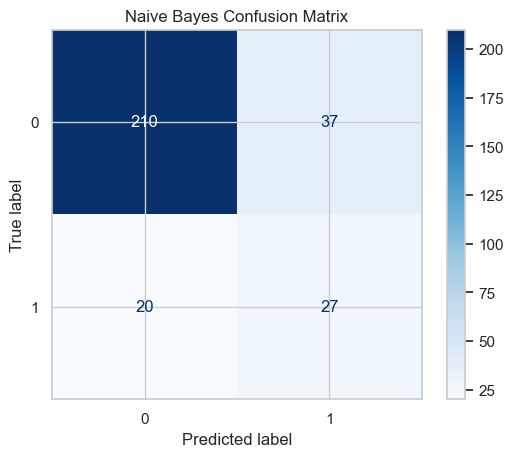


Decision Tree
Accuracy: 0.7585
Recall (Attrition = Yes): 0.3830
Best Params: {'classifier__max_depth': None}
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       247
           1       0.30      0.38      0.34        47

    accuracy                           0.76       294
   macro avg       0.59      0.61      0.59       294
weighted avg       0.78      0.76      0.77       294



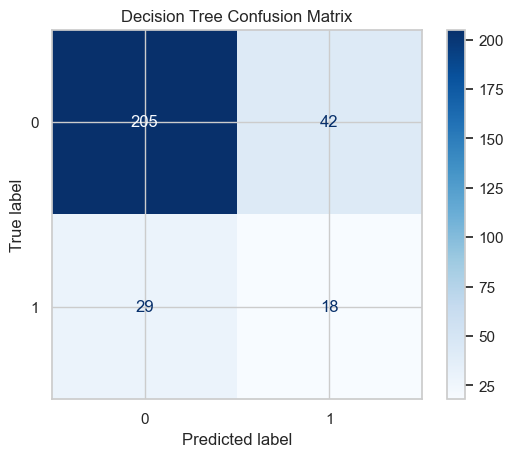


KNN
Accuracy: 0.8401
Recall (Attrition = Yes): 0.1489
Best Params: {'classifier__n_neighbors': 3}
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.50      0.15      0.23        47

    accuracy                           0.84       294
   macro avg       0.68      0.56      0.57       294
weighted avg       0.80      0.84      0.80       294



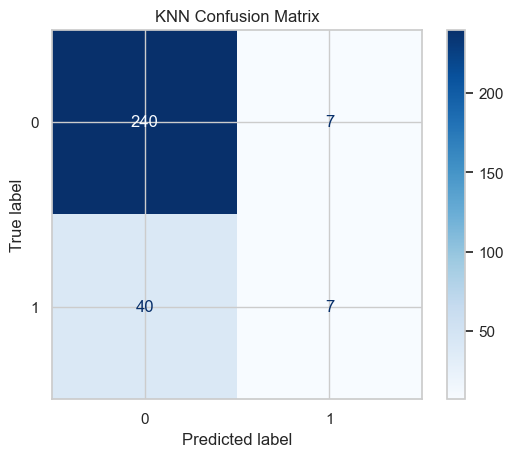

c:\Users\SYAM KUMAR\attrition_project\ds\lib\site-packages\xgboost\training.py:183: UserWarning:

[12:13:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\SYAM KUMAR\attrition_project\ds\lib\site-packages\xgboost\training.py:183: UserWarning:

[12:13:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\SYAM KUMAR\attrition_project\ds\lib\site-packages\xgboost\training.py:183: UserWarning:

[12:13:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\SYAM KUMAR\attrition_project\ds\lib\site-packages\xgboost\training.py:183: UserWarning:

[12:13:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\SYAM KUMAR\attrition_project\ds\lib\site-packages\xgboost\training.


XGBoost
Accuracy: 0.8503
Recall (Attrition = Yes): 0.2766
Best Params: {'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       247
           1       0.57      0.28      0.37        47

    accuracy                           0.85       294
   macro avg       0.72      0.62      0.64       294
weighted avg       0.83      0.85      0.83       294



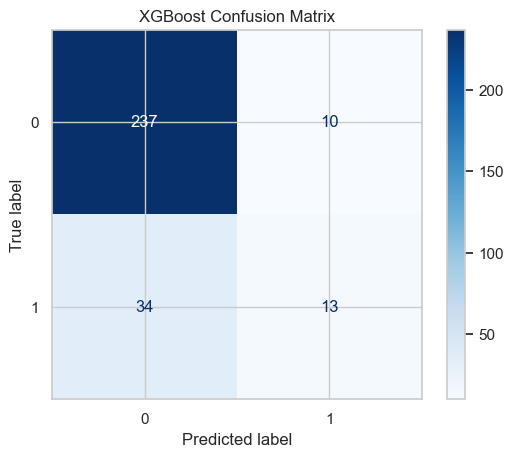


Best Model Saved: Logistic Regression with Recall (Attrition = Yes) = 0.7447
Loaded Model Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       247
           1       0.33      0.74      0.46        47

    accuracy                           0.72       294
   macro avg       0.63      0.73      0.63       294
weighted avg       0.84      0.72      0.75       294



In [138]:
best_recall = 0
best_model_name = None
best_model_obj = None
results = {}

for name, (model, param_grid) in models.items():
    pipe = Pipeline([('classifier', model)])

    if param_grid:
        grid = GridSearchCV(pipe, param_grid, cv=5, scoring='recall', refit=True)
        grid.fit(X_train, y_train)
        best_estimator = grid.best_estimator_
        best_params = grid.best_params_
    else:
        pipe.fit(X_train, y_train)
        best_estimator = pipe
        best_params = "Default"

    y_pred = best_estimator.predict(X_test)

    # Get recall for class 1
    recall_class1 = recall_score(y_test, y_pred, pos_label=1)  # or pos_label='Yes' if labels are strings
    acc = accuracy_score(y_test, y_pred)

    results[name] = {
        'accuracy': acc,
        'recall_class1': recall_class1,
        'best_params': best_params
    }

    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Recall (Attrition = Yes): {recall_class1:.4f}")
    print(f"Best Params: {best_params}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # Save best model based on recall of class 1
    if recall_class1 > best_recall:
        best_recall = recall_class1
        best_model_name = name
        best_model_obj = best_estimator

# === Save the best model ===
joblib.dump(best_model_obj, 'best_model.pkl')
print(f"\nBest Model Saved: {best_model_name} with Recall (Attrition = Yes) = {best_recall:.4f}")
loaded_model = joblib.load('best_model.pkl')
y_pred_loaded = loaded_model.predict(X_test)
print("Loaded Model Classification Report:")
print(classification_report(y_test, y_pred_loaded))


# Conclusion: Attrition Prediction Using Imbalanced Classification Techniques

In [139]:

# # In this project, we tackled the challenge of predicting attrition using imbalanced classification models. Whether it’s employee attrition or customer churn, the cost of missing true positives (i.e., not identifying someone who is likely to leave) is high. This makes recall a far more important metric than accuracy alone.

# # 🔍 Summary of Work:
# # We trained several models including Logistic Regression, Random Forest, and others.

# # Applied SMOTETomek to handle severe class imbalance.

# # Evaluated models using Confusion Matrix, Classification Report, and business-critical metrics like Recall, Precision, and F1-score.

# # Best-performing model was saved using joblib for future use.

# # 📉 Why Accuracy Was Misleading:
# # Although some models showed up to 85% accuracy, the true negatives were very low, indicating that many churned individuals were misclassified. This reinforced that:

# # High accuracy ≠ Good model in imbalanced classification.

# # ✅ Best Model Observations:
# # Logistic Regression gave the best recall score for the attrition class.

# # However, it still had many false negatives, which can be costly in real-world business scenarios.

# # Simply applying class balancing is not always sufficient—especially when the data is not easily separable.

# # 📌 What to Focus on in Real-World Attrition Use Cases:
# # Business Context Matters:

# # In attrition prediction, recall for the positive class (Attrition = Yes) is often more important than precision.

# # It's better to mistakenly target a non-churner than to miss a real churn risk.

# # Advanced Techniques to Improve Results:

# # Feature Engineering: Derive new features that better capture behavior leading to attrition.

# # Cost-sensitive learning: Penalize false negatives more heavily during training.

# # Model Ensemble & Threshold Tuning: Tune the decision threshold based on cost-benefit analysis or try ensemble models with different voting schemes.

# # More Data: Sometimes data quality or quantity is the limiting factor—request more samples if possible.

# # Start With EDA, Always:

# # Understand feature distributions, patterns, and imbalances.

# # Identify potential data leaks, outliers, and missing values before modeling.

# # 📦 Final Note
# # Attrition prediction is more than just a machine learning task—it’s a strategic business problem. A well-tuned model can help proactively retain employees or customers, saving significant costs and improving long-term relationships.

# # Always align model performance with business KPIs, not just technical metrics.

#If it is customer data I would have requested for more data and used more advanced techniques like feature engineering, cost-sensitive learning, and ensemble methods to improve the model's performance.

In [140]:
# # 🙌 All the Best!
# Wishing you success in your data science journey.
# Stay curious, keep building, and enjoy the ride!

# # Happy Coding & May Your Models Always Converge! 🚀🤖



In [142]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
